In [84]:
# !sudo apt-get udpate && sudo apt-get install apache2-utils

[sudo] password for anthony: 
[sudo] password for anthony: 

In [19]:
import requests
import matplotlib.pyplot as plt
from pprint import PrettyPrinter
import json
import numpy as np
from PIL import Image
pp = PrettyPrinter()

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(train_x, train_y), (test_x, test_y) = load_data()

In [85]:
tmp = train_x[:1]

In [86]:
# tmp = np.expand_dims(tmp, axis=0)
tmp = np.expand_dims(tmp, axis=-1)
tmp.shape

(1, 28, 28, 1)

### tensorflow/serving

In [52]:
data = json.dumps({"signature_name": "serving_default", "instances": tmp.tolist()})

In [68]:
res = json.loads(requests.post('http://localhost:8501/v1/models/lenet5:predict', data=data).text)

In [69]:
predictions = res['predictions']

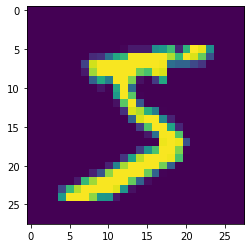

In [73]:
plt.imshow(tmp[0])

In [75]:
np.argmax(predictions[0])

5

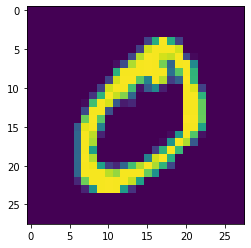

In [74]:
plt.imshow(tmp[1])

In [76]:
np.argmax(predictions[1])

0

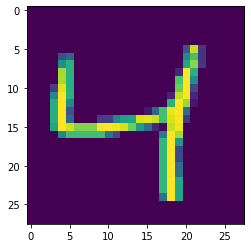

In [77]:
plt.imshow(tmp[2])

In [78]:
np.argmax(predictions[2])

4

### pytorch/torchserve

In [93]:
res = requests.get('http://localhost:8081/models/lenet5')

In [94]:
json.loads(res.text)

[{'modelName': 'lenet5',
  'modelVersion': '1.0',
  'modelUrl': 'lenet5.mar',
  'runtime': 'python',
  'minWorkers': 8,
  'maxWorkers': 8,
  'batchSize': 1,
  'maxBatchDelay': 100,
  'loadedAtStartup': True,
  'workers': [{'id': '9000',
    'startTime': '2020-09-04T11:48:24.858Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 34504704},
   {'id': '9001',
    'startTime': '2020-09-04T11:48:24.860Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 34418688},
   {'id': '9002',
    'startTime': '2020-09-04T11:48:24.861Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 20828160},
   {'id': '9003',
    'startTime': '2020-09-04T11:48:24.861Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 35876864},
   {'id': '9004',
    'startTime': '2020-09-04T11:48:24.862Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 35815424},
   {'id': '9005',
    'startTime': '2020-09-04T11:48:24.862Z',
    'status': 'READY',
    'gpu': False,
    'me

In [88]:
tmp.shape

(1, 28, 28, 1)

In [89]:
data = json.dumps(tmp.tolist())

In [100]:
requests.post('http://localhost:8080/predictions/lenet5', files={'media': 'test_data/0.png'}).text

'{\n  "code": 503,\n  "type": "InternalServerException",\n  "message": "Prediction failed"\n}\n'

In [120]:
!curl -X POST http://localhost:8080/predictions/lenet5 -T test_data/0.png

{
  "code": 503,
  "type": "InternalServerException",
  "message": "Prediction failed"
}
